## Gold Price Prediction

#### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#### Data Collection and Processing

In [3]:
# Loading the csv data to pandas DataFrame

gold_data = pd.read_csv("gold_price_data.csv")

In [4]:
#print the first 5 rows in the dataframe

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# printing the last 5 rows of the DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and column

gold_data.shape

(2290, 6)

In [7]:
# Getting some basic information about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Getting the Statistical measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Finding the correlation

1. Positive Correlation

2. Negative Correlation

In [16]:
correlation = gold_data.corr()

<AxesSubplot:>

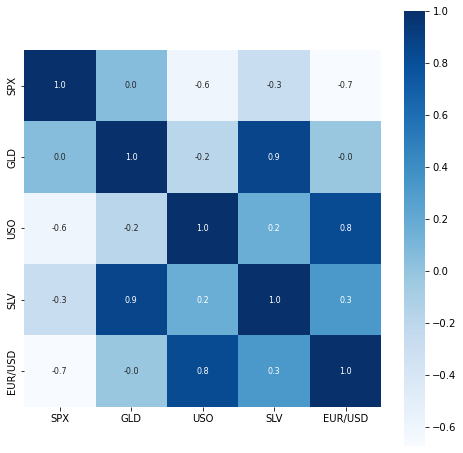

In [20]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
# Correlation values of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ANURAG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

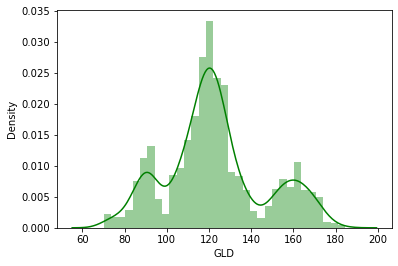

In [25]:
# Checking the distribution of the gold price

sns.distplot(gold_data["GLD"], color ="green")

 #### Splitting the Target and Feature
 

In [26]:
X= gold_data.drop(["Date","GLD"],axis=1)

y= gold_data["GLD"]

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Seperating into Training data and Test Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

#### Model Training

#### Random Forest Regressor

In [30]:
regressor = RandomForestRegressor()

In [32]:
# Training the model

regressor.fit(X_train,y_train)

RandomForestRegressor()

#### Model Evaluation

In [33]:
#prediction on test Data

test_data_prediction = regressor.predict(X_test)

In [34]:
print(test_data_prediction)

[168.452399    82.06919974 115.90320001 127.70960065 120.72600085
 154.81939863 150.38089807 126.15080015 117.39599864 125.91250095
 116.93860073 172.25950056 141.61209909 167.80459824 115.28949995
 117.77340044 138.96800325 169.96870064 159.26440244 160.14369971
 155.17780007 125.18879994 175.70549951 157.22300385 125.25610043
  93.66869984  77.59970028 120.48679992 119.04459912 167.51969984
  88.25140037 125.33690002  91.0500004  117.66800019 121.05369952
 137.02140099 115.45860094 115.20870058 148.66989947 107.00450107
 104.26470235  87.14799796 126.46380033 117.9942999  153.69379887
 119.50520013 108.39760028 108.11049816  93.332301   126.9372984
  75.00960023 113.77399919 121.52290005 111.3935991  118.89799899
 121.06449928 158.89009942 168.18740109 146.94089687  85.86929881
  94.34370018  86.78889902  90.5158999  118.93500066 126.39980069
 127.49899969 170.30059976 122.24059931 117.37709892  98.38259992
 167.88929974 142.85739799 132.27490205 121.17650215 121.60539917
 119.815300

In [35]:
# R squared error

error_score = metrics.r2_score(y_test,test_data_prediction)

print("R squared error : ", error_score)

R squared error :  0.9890066543667877


#### Compare Actual Values and Predicted values  in a Plot

In [36]:
y_test=list(y_test)



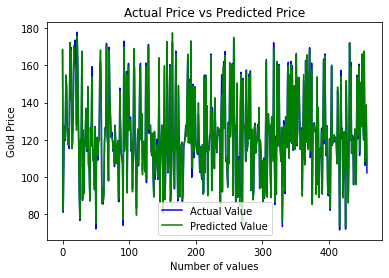

In [37]:
plt.plot(y_test,color="blue",label="Actual Value")
plt.plot(test_data_prediction, color="green", label="Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()